In [189]:
import acquire
import prepare
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as met
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

----
### Project Planning
----

- Create Readme.md with Initial Hypotheses and/or questions of the data, Data Dictionary, Project and Business Goals.
- Create a function to automate the process of Acquring the data from the Codeup Database and Saving it as a .CSV then save the function to acquire.py for importing into the final report.
- Clean and prepare data for the MVP run through the pipeline. Create functions for the cleaning and preparation, save them in pepare.py to import into the final report.
- Define two Hypotheses, set alpha, run statistical tests, reject or fail to reject the Null Hypothesis, then document findings.
- Establish Basseline Accuracy.
- Train three different classification models.
- Evaluate models on train and validate datasets.
- Choose the model that preforms the best and evaluate that single model on the test dataset.
- Create .csv with the evaluated data columns, probably of the target values, and model's prediction for each entry in __test__ dataset.
- Document conclusions and recommendations in final report.

---
### Executive Summary : Conclusions and Next Steps
---

- Of the models created (DecisionTree, RandomForest, and KNeighbors), the predictions were fairly similar, within a percent or two, all above my Baseline Accuracy of 73%.
- DecisionTree and RandomForest preformed the best, and closest. At 77% and 78%.
- Some initial exploration and statistical testing revealed the possibility that payment type as well as various services offered might play a larger role, and with more time should be explored further.


---
## Acquire Data
---

In [190]:
raw_df = acquire.get_telco_data()
raw_df.head()

,Unnamed: 0,customer_id,internet_service_type_id,payment_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,churn_month
0,0,0002-ORFBO,1,2,2,Female,0,Yes,Yes,9,...,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL,NaN
1,1,0003-MKNFE,1,2,1,Male,0,No,No,9,...,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL,NaN
2,2,0004-TLHLJ,2,1,1,Male,0,No,No,4,...,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic,2022-01-31
3,3,0011-IGKFF,2,1,1,Male,1,Yes,No,13,...,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic,2022-01-31
4,4,0013-EXCHZ,2,2,1,Female,1,Yes,No,3,...,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic,2022-01-31


#### Acquire Takeaways
- Wrote fuction to pull data from Codeup Database and save it locally as a .csv
- A lot of string data that will need to be converted to encoded for further exploration.

---
## Prepare Data
---

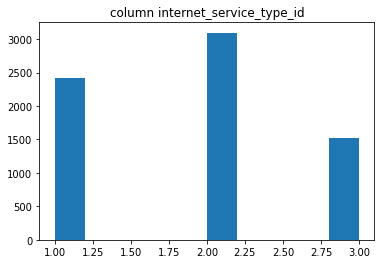

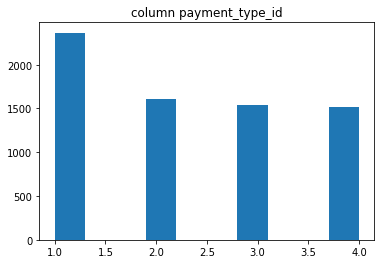

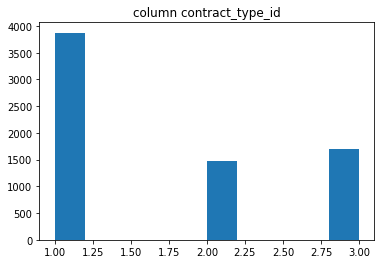

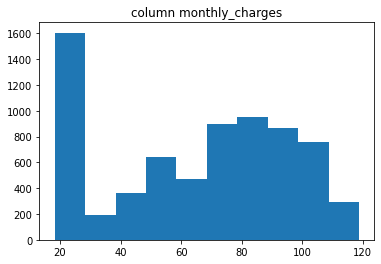

In [191]:
prepare.num_dist(raw_df)

In [192]:
df = prepare.prep_telco(raw_df)


In [193]:
train, validate, test = prepare.data_split(df, 'churn')
train.head()

,internet_service_type_id,payment_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3727,3,2,3,0,45,20.35,929.20,0,1,1,...,0,1,0,0,1,0,1,0,0,1
4271,3,2,1,0,34,20.65,716.40,1,1,1,...,0,1,0,0,0,0,1,0,0,1
6317,3,4,1,0,15,19.45,340.85,0,1,0,...,0,1,0,0,0,0,1,1,0,0
489,1,2,1,0,12,61.65,713.75,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3771,1,3,1,0,7,62.80,418.30,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [172]:
train.shape, validate.shape, test.shape

((4218, 34), (1407, 34), (1407, 34))

- Example of initial exploration for ties between other values and monthly charges. (0 = male, 1 = female for gender_encoded)

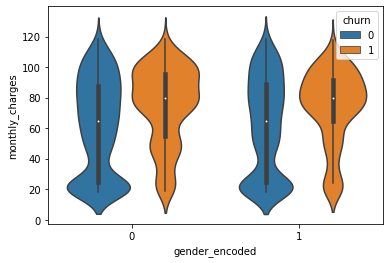

In [173]:
sns.violinplot(x='gender_encoded',y='monthly_charges', data=train, hue = 'churn')
plt.show()

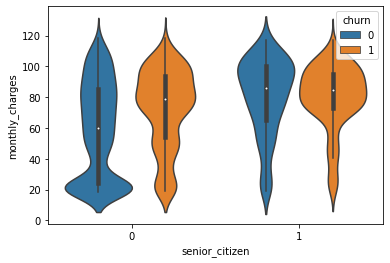

In [174]:
sns.violinplot(x='senior_citizen', y='monthly_charges', data=train, hue='churn')
plt.show()

payment_type_id : 1 = electronic check 2 = mailed check, 3 = bank tranfer (automatic), 4 = credit card (automatic)

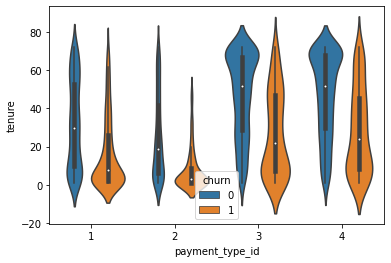

In [175]:
sns.violinplot(x='payment_type_id', y='tenure', data=train, hue='churn')
plt.show()

---
##### Baseline Accuracy
---

In [176]:
baseline = y_train.mode()
matches_baseline_pred = y_train == 0

baseline_accuracy = matches_baseline_pred.mean()
print(f"Baseline Accuracy is : {baseline_accuracy}")

Baseline Accuracy is : 0.7342342342342343


---
## Model and Evaluate
---

### MVP Models

In [177]:
X_train = train[['monthly_charges', 'payment_type_id', 'tenure', 'gender_encoded', 'senior_citizen']]
X_validate = validate[['monthly_charges', 'payment_type_id', 'tenure', 'gender_encoded', 'senior_citizen']]
X_test = test[['monthly_charges', 'payment_type_id', 'tenure', 'gender_encoded', 'senior_citizen']]
X_train.shape, X_validate.shape, X_test.shape

((4218, 5), (1407, 5), (1407, 5))

In [178]:
y_train = train.churn
y_validate = validate.churn
y_test = test.churn
y_train.shape, y_validate.shape, y_test.shape

((4218,), (1407,), (1407,))

In [179]:
# Models:
# Decision Tree
clf = DecisionTreeClassifier(max_depth=3, random_state=342)
clf = clf.fit(X_train, y_train)
# Random Forest
rf = RandomForestClassifier(min_samples_leaf=1, max_depth=3, random_state=342)
rf = rf.fit(X_train, y_train)
# KNearestNeighbor (KNN)
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn = knn.fit(X_train, y_train)
#Logistic Regression
logit = LogisticRegression(C=1, random_state=342, class_weight='balanced', intercept_scaling=1)
logit = logit.fit(X_train,y_train)

In [180]:
# Predictions by Model:
y_pred_clf = clf.predict(X_train)
y_pred_proba_clf = clf.predict_proba(X_train)

y_pred_rf = rf.predict(X_train)
y_pred_proba_rf = rf.predict_proba(X_train)

y_pred_knn = knn.predict(X_train)
y_pred_proba_knn = knn.predict_proba(X_train)

y_pred_logit = logit.predict(X_train)
y_pred_proba_logit = logit.predict_proba(X_train)

In [181]:
print('Accuracy of Decision Tree on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree on validate set: {:.2f}'.format(clf.score(X_validate, y_validate)))
print(classification_report(y_train, y_pred_clf))
print("---")
print('Accuracy of Random Forest on training set: {:.2f}'.format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest on validate set: {:.2f}'.format(rf.score(X_validate, y_validate)))
print(classification_report(y_train, y_pred_rf))
print("---")
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on validate set: {:.2f}'.format(knn.score(X_validate, y_validate)))
print(classification_report(y_train, y_pred_knn))
print("---")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))
print('Accuracy of Logistic Regression on validate set: {:.2f}'.format(logit.score(X_validate, y_validate)))
print(classification_report(y_train, y_pred_logit))

Accuracy of Decision Tree on training set: 0.79
Accuracy of Decision Tree on validate set: 0.77
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3097
           1       0.66      0.41      0.50      1121

    accuracy                           0.79      4218
   macro avg       0.74      0.67      0.68      4218
weighted avg       0.77      0.79      0.77      4218

---
Accuracy of Random Forest on training set: 0.78
Accuracy of Random Forest on validate set: 0.77
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      3097
           1       0.72      0.31      0.43      1121

    accuracy                           0.78      4218
   macro avg       0.75      0.63      0.65      4218
weighted avg       0.77      0.78      0.75      4218

---
Accuracy of KNN classifier on training set: 1.00
Accuracy of KNN classifier on validate set: 0.77
              precision    recall  f1-score   su

The 100% accuracy on the KNN model is unique to it's training set, changing the amount of neighbours doesn't seem to have an affect on it. But between 3 and 15, 10 has the greatest effect on the Validate set.

Confusion Matrix: by Model


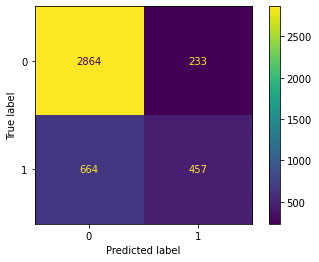

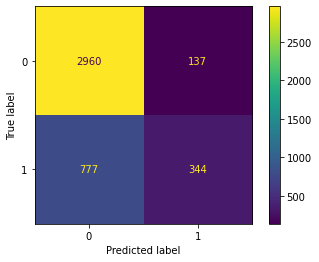

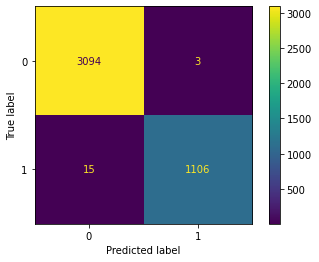

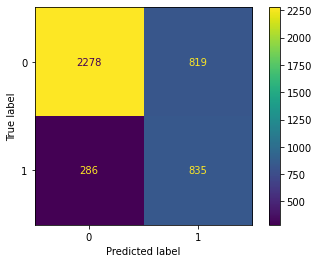

In [182]:
cm = confusion_matrix(y_train,y_pred_clf)
disp = met.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
cm2 = confusion_matrix(y_train,y_pred_rf)
disp2 = met.ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=rf.classes_)
cm3 = confusion_matrix(y_train,y_pred_knn)
disp3 = met.ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=knn.classes_)
cm4 = confusion_matrix(y_train, y_pred_logit)
disp4 = met.ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=logit.classes_)

disp.plot()
disp2.plot()
disp3.plot()
disp4.plot()
print("Confusion Matrix: by Model")
plt.show()

---
#### MVP Model : Takeaways
---

- Decision Tree, RandomForest, and KNN have similar accuracy of ~ 77% on the validate data. While Logistic Regression has the lowest rating of ~ 72%. 
- Only Decision Tree, RandomForest, and KNN over my Baseline Accuracy.
- I'm personally partial to KNN, as it judges distance from other points, weighs the data, then decides what the unknown is by grouping. So, I'll continue on with it.


---
### Testing the selected Model
---

In [183]:
real_test = y_test
pred_test = knn.predict(X_test)
print(classification_report(real_test, pred_test))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [184]:
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, real_test)))

Accuracy of KNN classifier on test set: 0.79


Confusion Matrix : KNN Model on Test


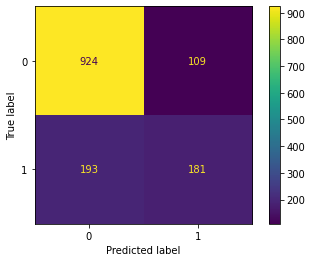

In [185]:
cm_test = confusion_matrix(real_test, pred_test)
disp_test = met.ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=knn.classes_)
disp_test.plot()
print("Confusion Matrix : KNN Model on Test")
plt.show()


---
#### Test the Model : Takeaway
---

- KNN model actually preformed 2% better than expected, so much less dropoff than might be expected.

---
#### Create Prediction CSV
---

In [186]:
probablity_test = knn.predict_proba(X_test)
probablity_df = pd.DataFrame(probablity_test, columns= knn.classes_.tolist())
probablity_df.head()

,0,1
0,0.955484,0.044516
1,1.000000,0.000000
2,0.470536,0.529464
3,0.902318,0.097682
4,1.000000,0.000000


In [187]:
df.head()

,internet_service_type_id,payment_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,1,2,2,0,9,65.6,593.30,1,1,1,...,1,0,0,1,0,0,0,0,0,1
1,1,2,1,0,9,59.9,542.40,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2,1,1,0,4,73.9,280.85,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,2,1,1,1,13,98.0,1237.85,0,1,0,...,1,0,1,0,0,1,0,0,1,0
4,2,2,1,1,3,83.9,267.40,1,1,0,...,1,0,0,0,0,1,0,0,0,1
